# Mobile 고객 이탈 분석

* 여러분은 OO 통신화사 데이터분석가 입니다.
* 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 데이터분석을 의뢰하였습니다.
* 고객 이탈여부(CHURN)에 영향을 주는 요인을 찾아 봅시다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [3]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,1,47711,183,17,730589.0,192,5,unsat,considering,0
1,0,74132,191,43,535092.0,349,2,unsat,no,1
2,1,150419,0,14,204004.0,682,6,unsat,considering,0
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0
4,1,23392,0,0,216707.0,233,15,unsat,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	Label	|


----

## 1.가설수립

* 숫자형 최소 3개이상, 범주형 최소 2개 이상씩, 전체 6개의 변수를 도출, 가설을 수립하시오.

* 가설1 : 연 수입액에 따른 이탈 여부 차이

* 가설2 : 월 초과사용 시간에 따른 이탈 여부 차이

* 가설3 : 핸드폰 가격에 따른 이탈 여부 차이

* 가설4 : 평균 통화시간에 따른 이탈 여부 차이

* 가설5 : 대학 졸업 여부에 따른 이탈 여부 차이

* 가설6 : 만족도 설문에 따른 이탈 여부 차이

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
④ 기초통계량

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) INCOME

1) 변수의 비즈니스 의미

- 연 수입액(단위 : 달러)

2) 숫자? 범주?

- 숫자

3) 전처리 사항

- NaN 존재 여부 및 조치 방안
- 가변수화 대상여부

In [3]:
mobile['INCOME'].isna().sum()

0

- 결측치가 없으므로 그대로 진행
- 숫자형이므로 가변수화 대상 아님

4) 기초통계량

In [4]:
mobile['INCOME'].describe()

count     18000.000000
mean      80314.400278
std       41703.420130
min       20007.000000
25%       42151.500000
50%       75501.500000
75%      116082.250000
max      159983.000000
Name: INCOME, dtype: float64

5) 분포 확인 (시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


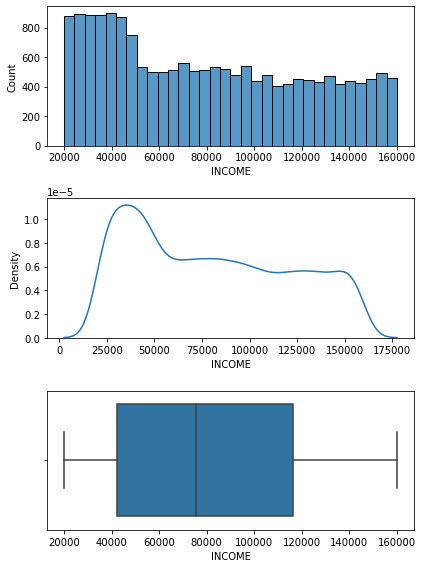

In [5]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(mobile['INCOME'], bins = 32)

plt.subplot(3,1,2)
sns.kdeplot(mobile['INCOME'])

plt.subplot(3,1,3)
sns.boxplot(mobile['INCOME'])

plt.tight_layout()
plt.show()

6) 위 정보로부터 파악한 내용(비즈니스!) 정리

- 연 수입액이 2만 달러 이상 6만 달러 미만인 사람들이 많음
- 단순히 연 수입액으로 이탈률을 판단하긴 어려움


7) 추가 분석해볼 사항 도출

- 1년 동안 돈을 어디에 사용하는지 파악하고, 통신비나 휴대폰을 구매하는데 사용 할 수 있는 돈은 얼마인지 추정해야함

### 2) OVERAGE

1) 변수의 비즈니스 의미

- 월 초과사용 시간(단위 : 분)

2) 숫자? 범주?

- 숫자

3) 전처리 사항

- NaN 존재 여부 및 조치 방안
- 가변수화 대상여부

In [6]:
mobile['OVERAGE'].isna().sum()

0

- 결측치가 없으므로 그대로 진행
- 숫자형이므로 가변수화 대상 아님

4) 기초통계량

In [7]:
mobile['OVERAGE'].describe()

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

5) 분포 확인 (시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


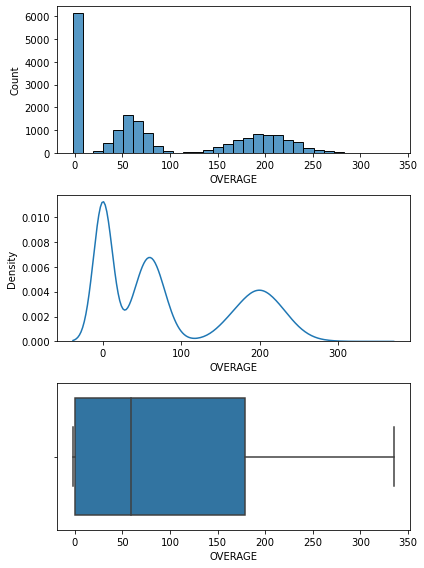

In [8]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(mobile['OVERAGE'], bins = 32)

plt.subplot(3,1,2)
sns.kdeplot(mobile['OVERAGE'])

plt.subplot(3,1,3)
sns.boxplot(mobile['OVERAGE'])

plt.tight_layout()
plt.show()

6) 위 정보로부터 파악한 내용(비즈니스!) 정리

- 대부분의 고객들은 월 마다 통화를 초과해서 사용하지 않음
- 다만 50분, 200분 구간에서 소폭 상승을 보임
- 요즘엔 데이터를 사용하는 음성 서비스(보이스톡 등)가 따로 있기 때문에 데이터 사용량도 살펴봐야함

⑦ 추가 분석해볼 사항 도출

- 요금제 별로 통화량에 집중한 패키지, 데이터 사용량에 집중한 패키지가 따로 있기 때문에
- 월 초과 사용량과 만족도를 동시에 파악하여 고객이 알맞은 요금제를 사용하고 있는지 아닌지 파악 필요함

### 3) HANDSET_PRICE

1) 변수의 비즈니스 의미

- 핸드폰 가격(단위 : 달러)

2) 숫자? 범주?

- 숫자

3) 전처리 사항

- NaN 존재 여부 및 조치 방안
- 가변수화 대상여부

In [9]:
mobile['HANDSET_PRICE'].isna().sum()

0

- 결측치가 없으므로 그대로 진행
- 숫자형이므로 가변수화 대상 아님

4) 기초통계량

In [10]:
mobile['HANDSET_PRICE'].describe()

count    18000.000000
mean       390.096667
std        214.239639
min        130.000000
25%        219.000000
50%        326.000000
75%        536.000000
max        899.000000
Name: HANDSET_PRICE, dtype: float64

5) 분포 확인 (시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


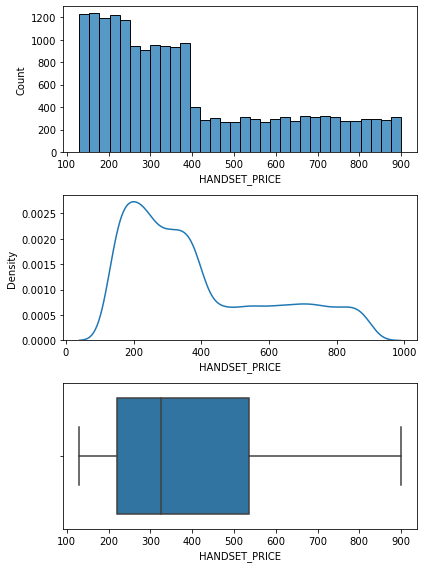

In [11]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(mobile['HANDSET_PRICE'], bins = 32)

plt.subplot(3,1,2)
sns.kdeplot(mobile['HANDSET_PRICE'])

plt.subplot(3,1,3)
sns.boxplot(mobile['HANDSET_PRICE'])

plt.tight_layout()
plt.show()

6) 위 정보로부터 파악한 내용(비즈니스!) 정리

- 약 75%의 고객이 550달러 미만의 보급형 핸드폰을 사용 중
- 데이터셋에 나이는 없지만, 젊은 사람들이 보통 갤럭시S, 아이폰 같은 고가형 프리미엄 핸드폰을 사용한다는 것으로 미루어보아
- 주요 고객층은 중장년층일 것이고 핸드폰을 사용하는 이유가 게임, 영상시청, SNS 같은 데이터 사용보다는 통화량에 집중되어있을 확률이 높음

7) 추가 분석해볼 사항 도출

- 중장년층은 한 가정의 가장일 확률이 높으므로 통신비외에도 생활에 필요한 여러가지에 지출이 생길 것이고
- 통신비를 아끼기 위해서 굳이 비싼 요금제를 사용하지 않을 것임

### 4) AVERAGE_CALL_DURATION

1) 변수의 비즈니스 의미

- 평균 통화 시간(단위 : 분)

2) 숫자? 범주?

- 숫자

3) 전처리 사항

- NaN 존재 여부 및 조치 방안
- 가변수화 대상여부

In [12]:
mobile['AVERAGE_CALL_DURATION'].isna().sum()

0

- 결측치가 없으므로 그대로 진행
- 숫자형이므로 가변수화 대상 아님

4) 기초통계량

In [13]:
mobile['AVERAGE_CALL_DURATION'].describe()

count    18000.000000
mean         5.990944
std          4.398894
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         15.000000
Name: AVERAGE_CALL_DURATION, dtype: float64

5) 분포 확인 (시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


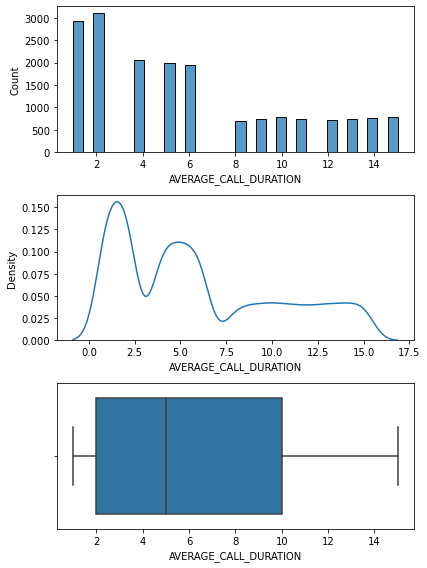

In [14]:
plt.figure(figsize = (6,8))
plt.subplot(3,1,1)
sns.histplot(mobile['AVERAGE_CALL_DURATION'], bins = 32)

plt.subplot(3,1,2)
sns.kdeplot(mobile['AVERAGE_CALL_DURATION'])

plt.subplot(3,1,3)
sns.boxplot(mobile['AVERAGE_CALL_DURATION'])

plt.tight_layout()
plt.show()

6) 위 정보로부터 파악한 내용(비즈니스!) 정리

- 75%의 고객들의 평균 통화시간은 10분 이내임
- 10분 이내의 통화에서 오갔을 대화를 유추하면 대부분 가벼운 안부전화나 약속을 잡는 등 실생활과 밀접한 내용이었을 것임
- 만약 통신사 광고를 낸다면, 서민적이고 가족적이고 따뜻한 느낌의 광고를 내면 기존 고객들에게 효과가 높을 것임

7) 추가 분석해볼 사항 도출

- 평균 통화시간 10분 이내인 중장년층의 고객들이 굳이 번거로운 번호 이동을 하면서까지 이탈하는 이유는
- 사용하는 요금제의 가성비가 떨어지거나, 통신 상태에 불만이 있거나, 경쟁사의 프로모션에 밀렸거나 정도로 생각할 수 있다.
- 따라서 그와 연관된 데이터를 분석하여 사업 계획을 세워야 한다.

### 5) COLLEGE

1) 변수의 비즈니스 의미

- 대학 졸업 여부

2) 숫자? 범주?

- 범주

In [15]:
mobile['COLLEGE'].unique()

array([1, 0], dtype=int64)

- 범주 값의 종류는 1,0

3) 전처리 사항

- NaN 존재 여부 및 조치 방안
- 가변수화 대상여부

In [16]:
mobile['COLLEGE'].isna().sum()

0

- 결측치가 없으므로 그대로 진행
- 범주형이지만 데이터셋에 이미 1,0으로 분류되어있으므로 가변수화 필요 없음

4) 기초통계량

In [17]:
# 범주별 빈도수
mobile['COLLEGE'].value_counts()

1    9049
0    8951
Name: COLLEGE, dtype: int64

In [18]:
# 범주별 비율
mobile['COLLEGE'].value_counts() / mobile['COLLEGE'].shape[0]

1    0.502722
0    0.497278
Name: COLLEGE, dtype: float64

5) 분포 확인 (시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


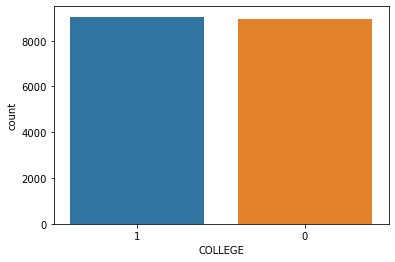

In [19]:
sns.countplot(mobile['COLLEGE'], order = [1,0])
plt.show()

6) 위 정보로부터 파악한 내용(비즈니스!) 정리

- 대학을 졸업한 고객과 그렇지 않은 고객의 비율이 거의 비슷함
- 대학 졸업 여부가 이탈률과 관련이 있는지 알 수 없음
- 하지만 대학을 졸업하지 못한 고객들은 학력에 대한 열등감이 있을 수 있기 때문에
- 프로모션을 진행할 때 학벌차이를 두어 일부만 서비스를 제공받는 경우는 권장되지 않음 (ex: 대학교 졸업장 인증하면 통신비 할인!)

7) 추가 분석해볼 사항 도출

- 혹시 대학 졸업 여부가 연 수입과 관련되어 있는지 확인해봐야 함
- 연 수입만 보았을 때는 유의미한 차이를 찾을 수 없었지만 대학 졸업 여부와 같이 검토해보면 새로운 사실이 나올 수 있음

### 6) REPORTED_SATISFACTION

1) 변수의 비즈니스 의미

- 만족도 설문

2) 숫자? 범주?

In [20]:
mobile['REPORTED_SATISFACTION'].unique()

array(['unsat', 'very_unsat', 'very_sat', 'sat', nan, 'avg'], dtype=object)

- 범주 값의 종류는 'unsat', 'very_unsat', 'very_sat', 'sat', nan, 'avg'

3) 전처리 사항

- NaN 존재 여부 및 조치 방안
- 가변수화 대상여부

In [21]:
mobile['REPORTED_SATISFACTION'].isna().sum()

38

- 결측치가 38개가 있음
- 결측치가 있다는 것은 만족도 조사에 답하지 않았다는 것인데 이 것을 보통인 'avg'에 편입시키기에는 너무 위험함
- 상황 하나를 들어보자, 이 통신사 고객인 A씨가 좋지 못한 통화 품질로 인해 강원도 최전방으로 입대한 아들의 연락을 받지 못하였다면?
- 고객 설문 조차 스팸으로 여기는 그런 고객이 었다면? 보통은 불만을 가질 확률이 높다.
- 극단적인 상황이라도 불만족에 가까운 사람을 보통 혹은 만족으로 끌어올릴 경우 전체 분석에 혼란을 야기할 수 있으므로
- 일단 결측치 값은 빼고 계산한 뒤, 상급자에게 보고한다.

In [22]:
tmp = mobile.loc[mobile['REPORTED_SATISFACTION'].notnull()]

In [23]:
# REPORTED_SATISFACTION 의 결측치 제거
print(tmp['REPORTED_SATISFACTION'].isna().sum())

0


- 매우 불만족인 'very_unsat'을 기준으로 0부터 'vary_sat'인 4까지 가변수화 필요

4) 기초통계량

In [24]:
tmp['REPORTED_SATISFACTION'].value_counts()

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64

In [25]:
tmp['REPORTED_SATISFACTION'].value_counts() / tmp['REPORTED_SATISFACTION'].shape[0]

very_unsat    0.393720
very_sat      0.253981
unsat         0.199866
avg           0.100546
sat           0.051887
Name: REPORTED_SATISFACTION, dtype: float64

5) 분포 확인(시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


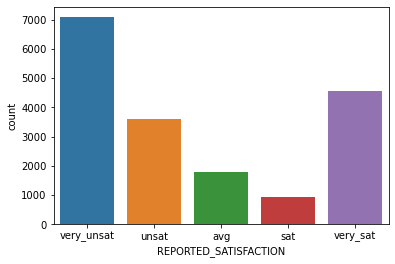

In [26]:
sns.countplot(tmp['REPORTED_SATISFACTION'], order = ['very_unsat','unsat','avg', 'sat', 'very_sat'])
plt.show()

6) 위 정보로부터 파악한 내용(비즈니스!) 정리

- 매우 불만족과 불만족의 비율이 굉장히 높은 것을 알 수 있다.
- 단, 매우 만족도 낮은 수준은 아니기 때문에
- 어떤 부분에서 이런 극단적인 현상이 생겼는지 다른 데이터들과 비교하면서 유추해야한다.

7) 추가 분석해볼 사항 도출

- 만족도에 따른 통화량 차이
- 연 수입과 초과 통화량 등과의 비교

### 7) CHURN(target)

In [27]:
target = 'CHURN'

1) 변수의 비즈니스 의미

- 이탈여부(1 : 이탈, 0 : 잔류)

2) 숫자? 범주?

- 범주

In [28]:
mobile[target].unique()

array([0, 1], dtype=int64)

- 범주 값의 종류 1, 0

3) NaN 존재 유무 및 조치방안

In [29]:
mobile[target].isna().sum()

0

- 결측치가 없으므로 그대로 진행
- 범주형이지만 데이터셋에 이미 1,0으로 분류되어있으므로 가변수화 필요 없음

4) 기초통계량

In [30]:
mobile[target].value_counts()

0    9131
1    8869
Name: CHURN, dtype: int64

In [31]:
mobile[target].value_counts() / mobile[target].shape[0]

0    0.507278
1    0.492722
Name: CHURN, dtype: float64

5) 분포 확인 (시각화)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


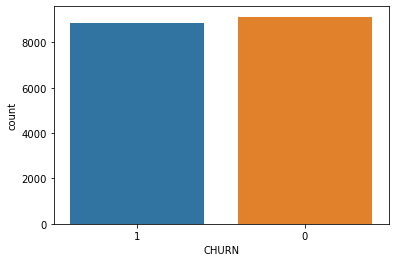

In [32]:
sns.countplot(mobile[target], order = [1,0])
plt.show()

6) 위 정보로부터 파악한 내용(비즈니스!) 정리

- 전체 고객 중에 이탈 고객이 무려 49%나 됨
- 대학 졸업 여부 비율과 상당히 비슷한 양상을 띔
- 이 정도의 이탈률이면 회사 측에서 소비자들에게 어떤 실수를 한 것은 아닌가 의심됨

7) 추가 분석해볼 사항 도출

- 대학 졸업 여부와 이탈률 비교
- 만족도 조사와 대학 졸업 여부 비교

### 8) 추가1

In [52]:
mobile.describe()
mobile['INCOME'].dtypes

dtype('int64')

In [74]:
mobile.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,CONSIDERING_CHANGE_OF_PLAN,CHURN,qq,ab
0,1,47711,183,17,730589.0,192,5,unsat,considering,0,1r,qw
1,0,74132,191,43,535092.0,349,2,unsat,no,1,1r,qw
2,1,150419,0,14,204004.0,682,6,unsat,considering,0,1f,1f
3,0,159567,0,58,281969.0,634,1,very_unsat,never_thought,0,1f,1f
4,1,23392,0,0,216707.0,233,15,unsat,no,1,1r,1s


## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [33]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

#### 1) COLLEGE --> CHURN
#### 대학 졸업 여부에 따라 이탈률에 차이가 있다. (대립가설)

In [34]:
# 집계 - 단순 카운트
pd.crosstab(mobile[target], mobile['COLLEGE'])

COLLEGE,0,1
CHURN,,
0,4616,4515
1,4335,4534


In [35]:
# 집계 - 행을 기준으로 표준화 함(비율을 한눈에 보기 위해)
temp = pd.crosstab(mobile[target], mobile['COLLEGE'], normalize = 'index')
print(temp)

COLLEGE         0         1
CHURN                      
0        0.505531  0.494469
1        0.488781  0.511219


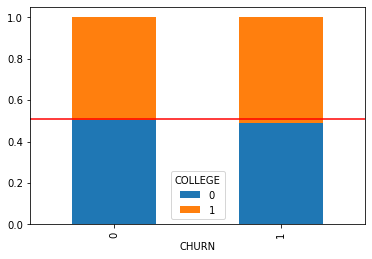

In [36]:
# 시각화1
temp.plot.bar(stacked=True)
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

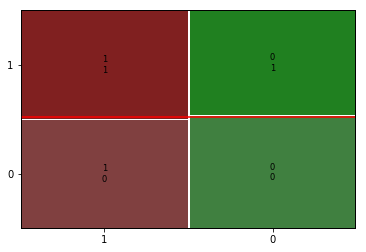

In [37]:
# 시각화2
mosaic(mobile, ['COLLEGE',target])
plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

- 그래프가 평균선과 아주 약간의 차이가 있다. 이것만으로 대립가설이 옳다고 판단하긴 이르다.
- 수치화를 해봐야 한다.

In [38]:
table = pd.crosstab(mobile[target], mobile['COLLEGE'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 COLLEGE     0     1
CHURN              
0        4616  4515
1        4335  4534
----------------------------------------------------------------------------------------------------
카이제곱통계량 4.982102934693503
p-value 0.025610833478220536
기대빈도
 [[4540.64338889 4590.35661111]
 [4410.35661111 4458.64338889]]


- 카이 제곱 통계량(4)가 자유도(1) 보다 2~3배 크고
- p-value또한 2%로 대립가설이 참이라 할 수 있다.
- 결론 : 대학 졸업 여부는 이탈률과 약한 관계가 있다.

#### 2) REPORTED_SATISFACTION --> CHURN
#### 만족도에 따라 이탈률에 차이가 있다. (대립가설)

In [39]:
# 집계 - 단순 카운트
pd.crosstab(mobile[target], mobile['REPORTED_SATISFACTION'])

REPORTED_SATISFACTION,avg,sat,unsat,very_sat,very_unsat
CHURN,,,,,
0,952,492,1792,2334,3543
1,854,440,1798,2228,3529


In [40]:
# 집계 - 행을 기준으로 표준화 함(비율을 한눈에 보기 위해)
temp2 = pd.crosstab(mobile[target], mobile['REPORTED_SATISFACTION'], normalize = 'index')
print(temp2)

REPORTED_SATISFACTION       avg       sat     unsat  very_sat  very_unsat
CHURN                                                                    
0                      0.104466  0.053989  0.196642  0.256118    0.388785
1                      0.096508  0.049723  0.203187  0.251780    0.398802


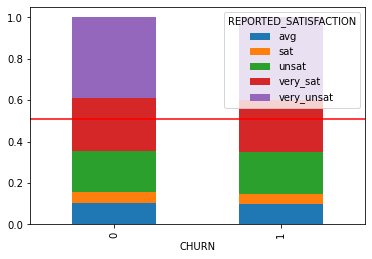

In [41]:
# 시각화1
temp2.plot.bar(stacked=True)
plt.axhline(1-mobile[target].mean(), color = 'r')
plt.show()

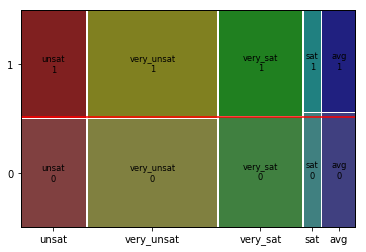

In [42]:
# 시각화2
mosaic(mobile, ['REPORTED_SATISFACTION',target])
plt.axhline(1- mobile[target].mean(), color = 'r')
plt.show()

- Stacked Bar에서는 차이가 있어보이는데 Mosaic에서는 직관적이지가 않다.
- 수치화를 통해 알아보자.

In [43]:
table2 = pd.crosstab(mobile[target], mobile['REPORTED_SATISFACTION'])
print('교차표\n', table)
print('-' * 100)

# 카이제곱검정
result = spst.chi2_contingency(table2)
print('카이제곱통계량', result[0])
print('p-value', result[1])
print('기대빈도\n',result[3])

교차표
 COLLEGE     0     1
CHURN              
0        4616  4515
1        4335  4534
----------------------------------------------------------------------------------------------------
카이제곱통계량 6.8411009572056445
p-value 0.14452738878905066
기대빈도
 [[ 916.27201871  472.84912593 1821.38236277 2314.5254426  3587.97104999]
 [ 889.72798129  459.15087407 1768.61763723 2247.4745574  3484.02895001]]


- 카이제곱통계량도 자유도 보다 2~3배 크지 않고
- p값도 10%로 대립가설 기준에 못 미친다.
- 결론 : 예상 외로 만족도 조사는 이탈률과 관련이 없다.

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) INCOME --> CHURN
#### 연 수입에 따라 이탈률에 차이가 있다. (대립가설)

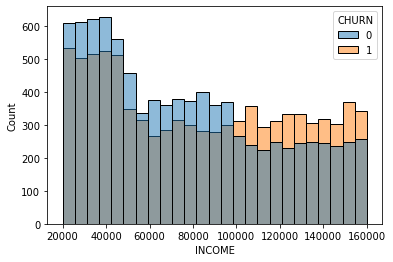

In [44]:
# 시각화1
sns.histplot(x='INCOME', data = mobile, hue = target)
plt.show()

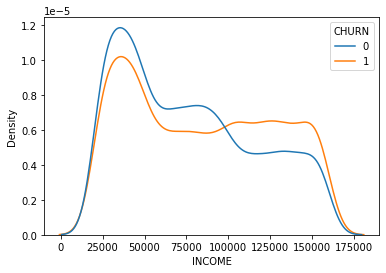

In [45]:
# 시각화2
sns.kdeplot(x='INCOME', data = mobile, hue = target, common_norm = False)
plt.show()

- 그래프만 봤을 때는 관계가 없는 것 같지만, 의심해봐야 한다.
- 수치화가 필요하다.

In [46]:
# 로지스틱 모형 (수치화)
model = sm.Logit(mobile[target], mobile['INCOME'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692683
         Iterations 2
INCOME    0.000044
dtype: float64


- p값이 0.000044 이므로 대립가설은 참이고, 강한 관계가 있다고 볼 수 있다.
- 결론 : 연 수입과 이탈률은 강한 관계 -> 수입이 낮으면 이탈률도 증가 -> 통신 품질이나 프로모션의 문제가 아닌 요금제 문제일 확률 높음
- 대학 졸업 여부와 연 수입을 다시 비교해서 보충 설명을 한다.

In [47]:
model = sm.Logit(mobile['COLLEGE'], mobile['INCOME'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693104
         Iterations 2
INCOME    0.211635
dtype: float64


- p값이 20%로 대학 졸업 여부와 연 수입에는 관계가 없다.

#### 2)OVERAGE --> CHURN
#### 월 초과사용량에 따라 이탈률에 차이가 있다. (대립 가설)

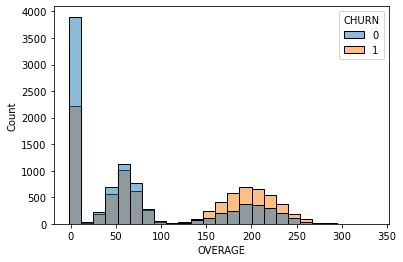

In [48]:
# 시각화1
sns.histplot(x='OVERAGE', data = mobile, hue = target)
plt.show()

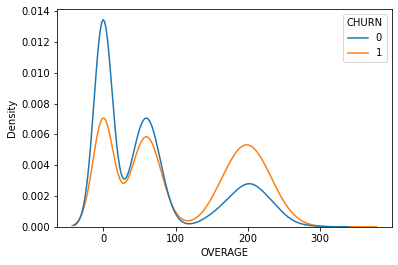

In [49]:
# 시각화2
sns.kdeplot(x='OVERAGE', data = mobile, hue = target, common_norm = False)
plt.show()

- 월 초과 통화량이 높을 수록 이탈률이 높은 것으로 보인다.
- 수치화 해볼 필요성이 있다.

In [50]:
# 로지스틱 모형 (수치화)
model = sm.Logit(mobile[target], mobile['OVERAGE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680553
         Iterations 4
OVERAGE    3.521095e-97
dtype: float64


- p값이 0에 수렴한다.
- 초과통화량과 이탈률은 강한 관계라고 할 수 있다.
- 연 수입에 따라 이탈률에 차이를 보였고, 초과통화량에 따라 이탈률에 차이를 보였으니
- 이 통신사의 요금제는 통화와 관련된 부분에서 타사보다 가성비가 낮고 혜택이 부족했다고 볼 수 있다.

#### 3) HANDSET_PRICE --> CHURN
#### 핸드폰 가격에 따라 이탈률에 차이가 있다. (대립가설)

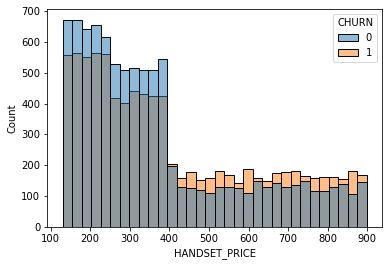

In [51]:
# 시각화1
sns.histplot(x='HANDSET_PRICE', data = mobile, hue = target)
plt.show()

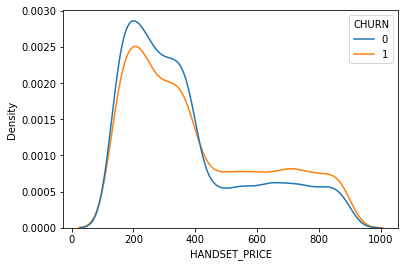

In [52]:
# 시각화2
sns.kdeplot(x='HANDSET_PRICE', data = mobile, hue = target, common_norm = False)
plt.show()

- 그래프로만 봤을 때는 직관적으로 다가오지 않는다.
- 수치화가 필요하다.

In [53]:
# 로지스틱 모형 (수치화)
model = sm.Logit(mobile[target], mobile['HANDSET_PRICE'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692730
         Iterations 3
HANDSET_PRICE    0.000107
dtype: float64


- p값이 0.000107로 강한 관계를 형성하고 있다.
- 휴대폰 가격이 비쌀 수록 이탈률 또한 늘어난 것으로 보아, 휴대폰이 고급이면 상대적으로 젊은 고객일 것이고
- 젊은 고객은 요금제 변경 같이 번거로운 작업에 큰 무리가 없을 것이고, 가성비를 생각했을 때 다른 통신사로 이탈했을 것이다.

#### 4) AVERAGE_CALL_DURATION --> CHURN
#### 평균 통화시간에 따라 이탈률에 차이가 있다.

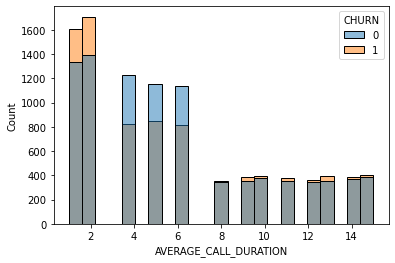

In [54]:
# 시각화1
sns.histplot(x='AVERAGE_CALL_DURATION', data = mobile, hue = target)
plt.show()

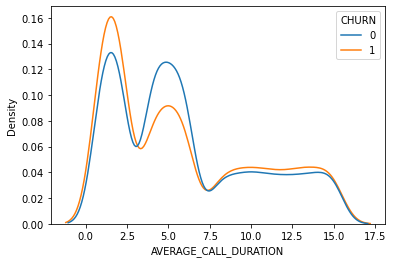

In [55]:
# 시각화2
sns.kdeplot(x='AVERAGE_CALL_DURATION', data = mobile, hue = target, common_norm = False)
plt.show()

In [56]:
# 로지스틱 모형 (수치화)
model = sm.Logit(mobile[target], mobile['AVERAGE_CALL_DURATION'])
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693027
         Iterations 3
AVERAGE_CALL_DURATION    0.03783
dtype: float64


- p값이 3%로 관계는 있으나 중간 정도의 관계를 형성한다.
- 결론 : 평균 통화시간은 이탈률과 중간 정도의 관계를 갖는다.
- 따라서 통화 시간과 관련된 요금제 프로모션을 진행하는 것이 좋아보인다.

## 4.관계 정리

### 1) 강한관계의 변수

'INCOME', 'OVERAGE', 'HANDSET_PRICE'

### 2) 약한관계의 변수

'COLLEGE', 'AVERAGE_CALL_DURATION'(중간)

### 3) 관계 없음

'REPORTED_SATISFACTION'

## 5.추가 분석

- 집 값과 연 소득을 비교하고 하나의 변수로 통합하여 이탈률과 비교한다.
- 이탈률이 요금제의 가성비 부족으로 증가한다는 것을 알 수 있을 것이다.